In [86]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt
import matplotlib.image as mpimg

In [77]:

# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

# Read in an image
img = cv2.imread('test_image.png')

# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[:2], None, None)
    img = cv2.undistort(img, mtx, dist)
    undist = np.copy(img)  # Delete this line
    return undist

undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [108]:
imgpoints[0].shape

(48, 1, 2)

src: (4, 2)
[[ 436.50708   114.335556]
 [1103.9984    224.66327 ]
 [1075.5115    658.0274  ]
 [ 465.32727   768.5894  ]]
[[ 100.  100.]
 [1180.  100.]
 [1180.  860.]
 [ 100.  860.]]
dst: (4, 2)


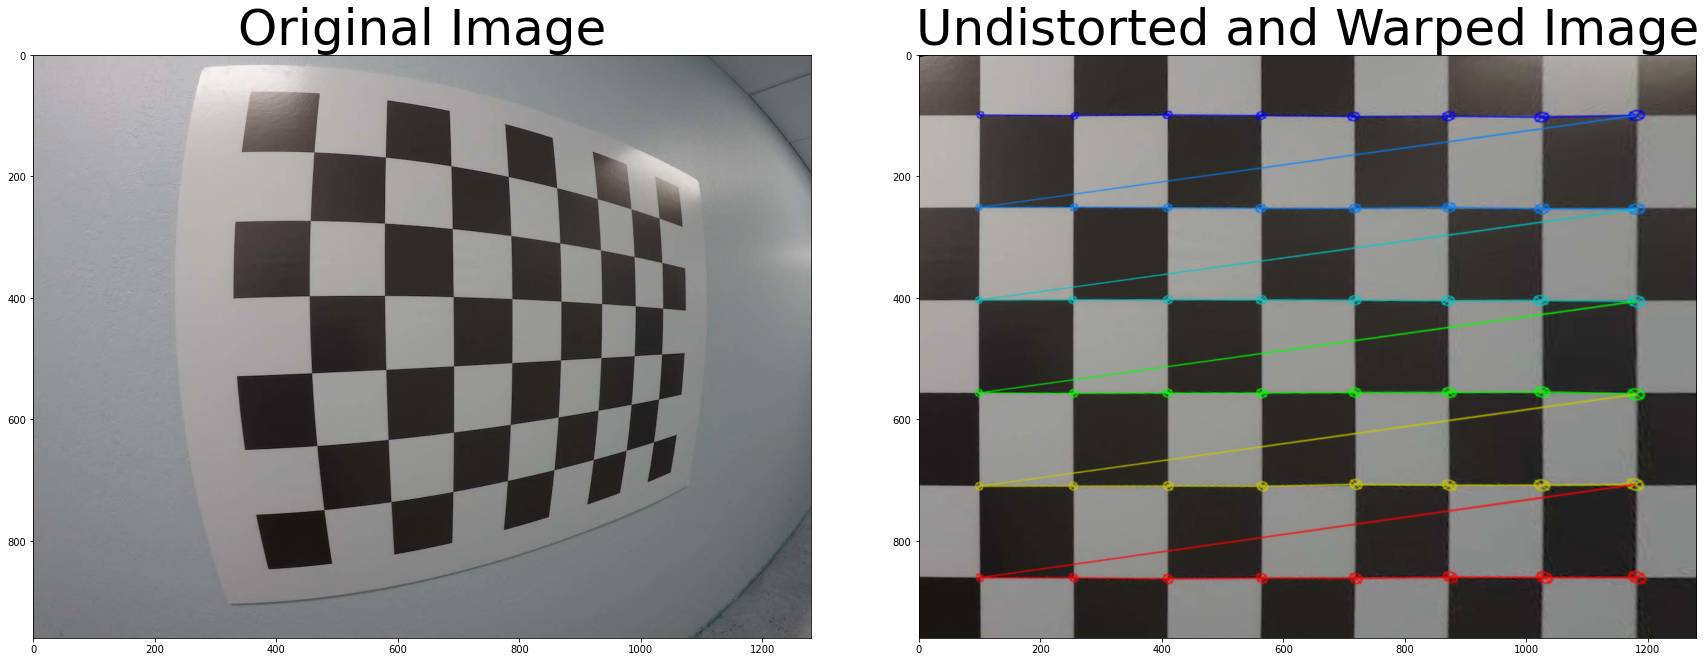

In [5]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y
# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
src = None
dst = None
def corners_unwarp(img, nx, ny, mtx, dist):
    global src
    global dst
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    img = cv2.undistort(img, mtx, dist)
    # 2) Convert to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h, w = img_gray.shape
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(img_gray, (nx, ny), None)
    # 4) If corners found: 
    if ret:
            offset = 100
            # a) draw corners
            cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
            src = np.vstack([corners[0][0], corners[nx-1][0], corners[-1], corners[-nx]])
            print('src: {}'.format(src.shape))
            print(src)
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            dst = np.float32([[offset, offset], [w-offset, offset], [w-offset, h-offset], [offset, h-offset]])
            print(dst)
            print('dst: {}'.format(dst.shape))
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            M = cv2.getPerspectiveTransform(src, dst)
            # e) use cv2.warpPerspective() to warp your image to a top-down view
            warped = cv2.warpPerspective(img, M, (w, h), flags=cv2.INTER_LINEAR)
    #delete the next two lines
    #M = None
    #warped = np.copy(img) 
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

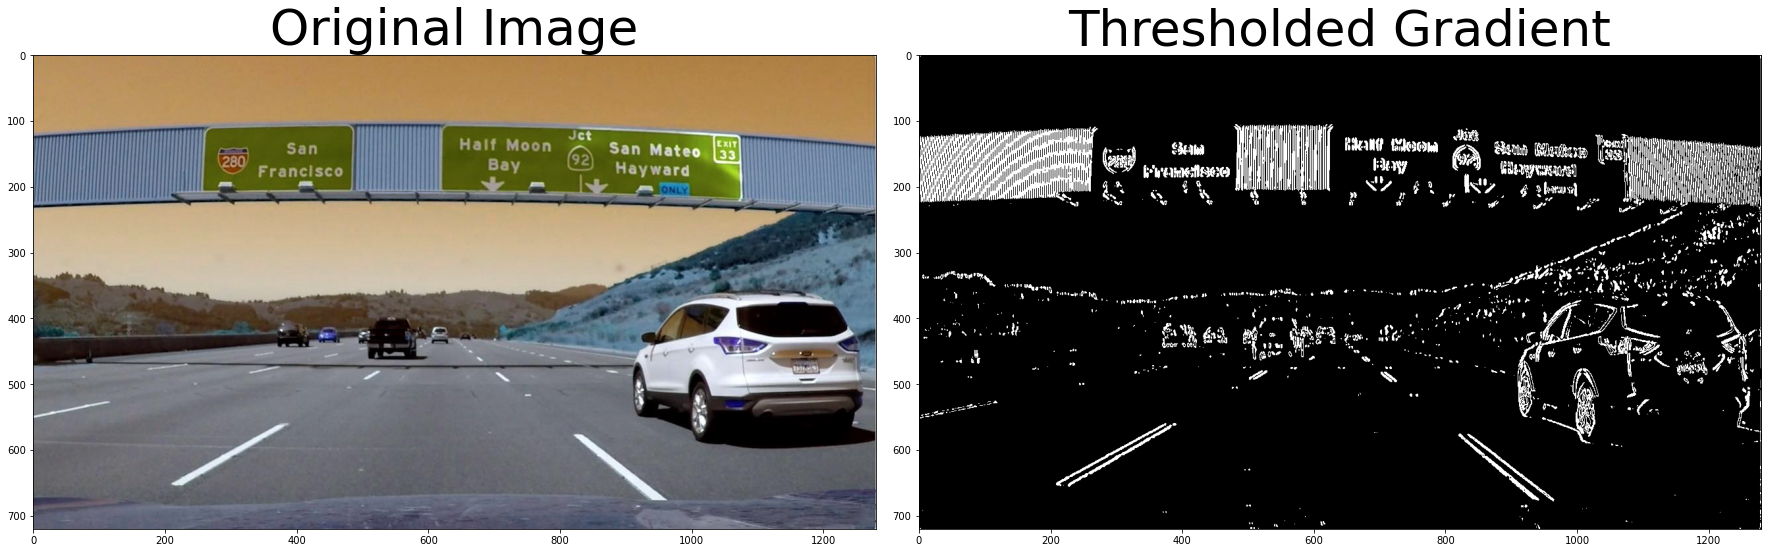

In [23]:
# Read in an image and grayscale it
image = cv2.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y,  # then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=20, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    elif orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    else:
        return img
    # 3) Take the absolute value of the derivative or gradient
    sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    sobel = np.uint8(255 * sobel / np.max(sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_output = np.zeros_like(sobel)
    binary_output[(sobel >= thresh[0]) & (sobel <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output
    
# Run the function
ksize = 5
grad_binary = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

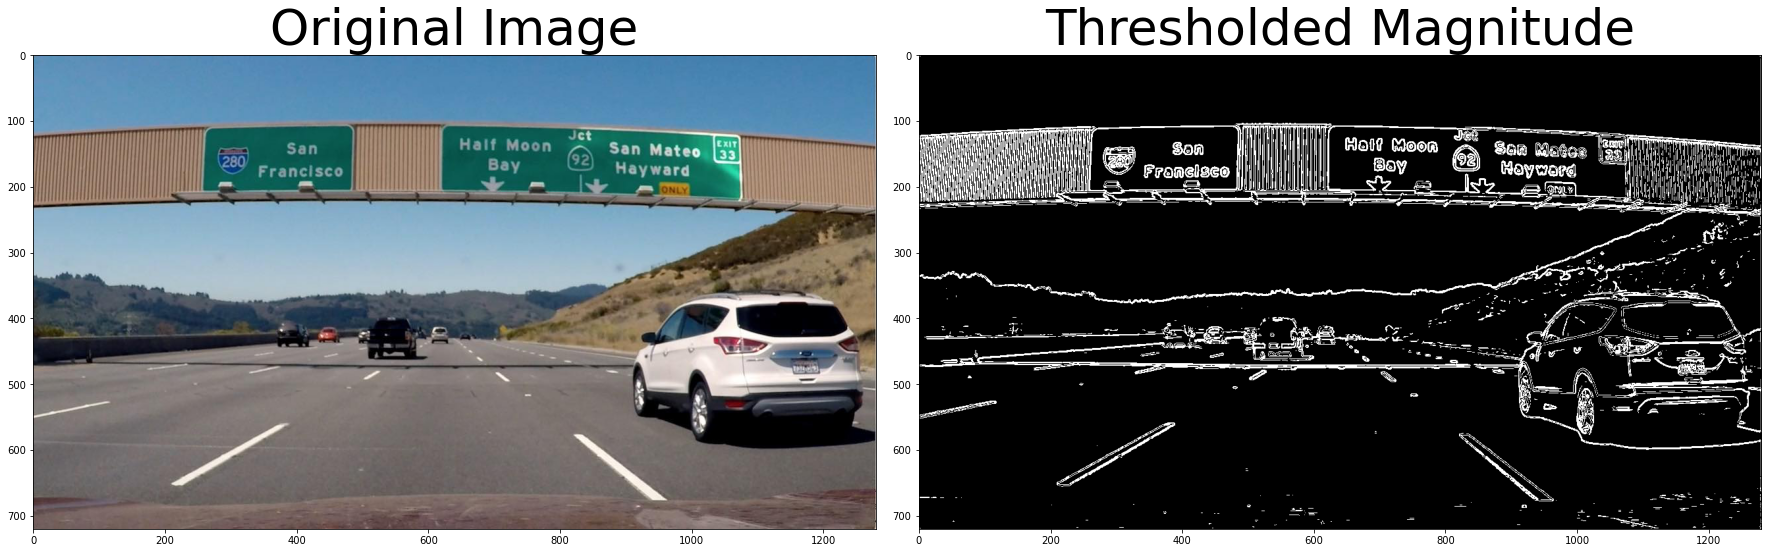

In [24]:
# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    sobel = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)
    
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    sobel = np.uint8(255 * sobel / np.max(sobel))
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(sobel)
    binary_output[(sobel >= mag_thresh[0]) & (sobel <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

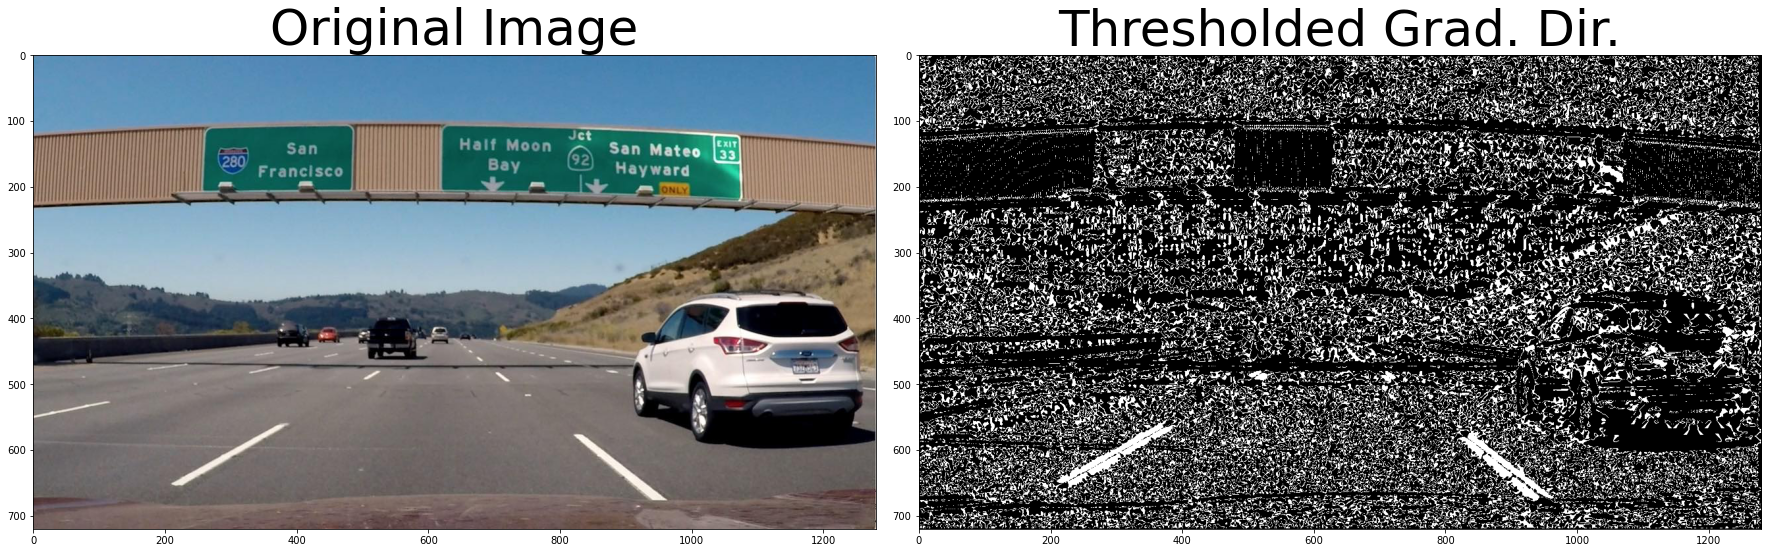

In [28]:
# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    # 3) Take the absolute value of the x and y gradients
    sobel_x = np.abs(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    sobel_y = np.abs(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    grad_angle = np.arctan2(sobel_y, sobel_x);
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(grad_angle)
    binary_output[(grad_angle >= thresh[0]) & (grad_angle <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.75, 1.2))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [27]:
180 / np.pi * 1.3


74.48451336700703

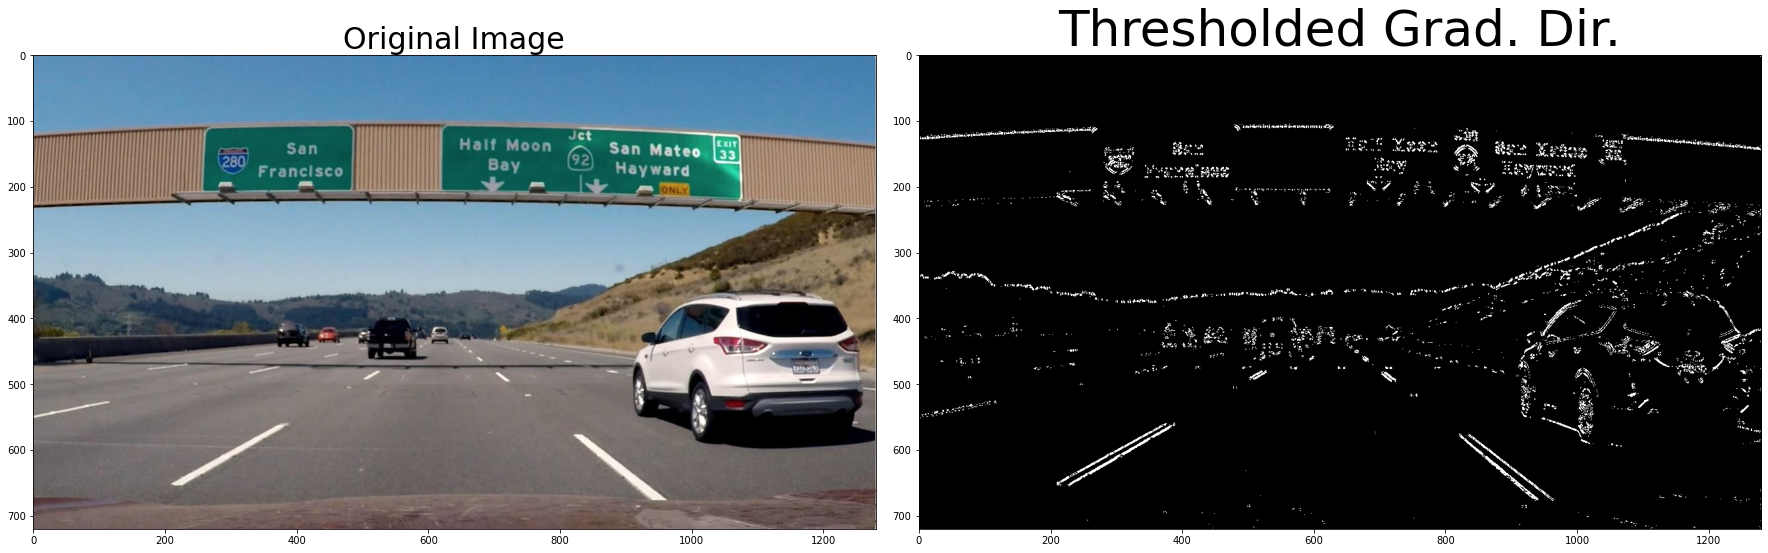

In [10]:
image = cv2.imread('signs_vehicles_xygrad.png')[:,:,::-1]
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


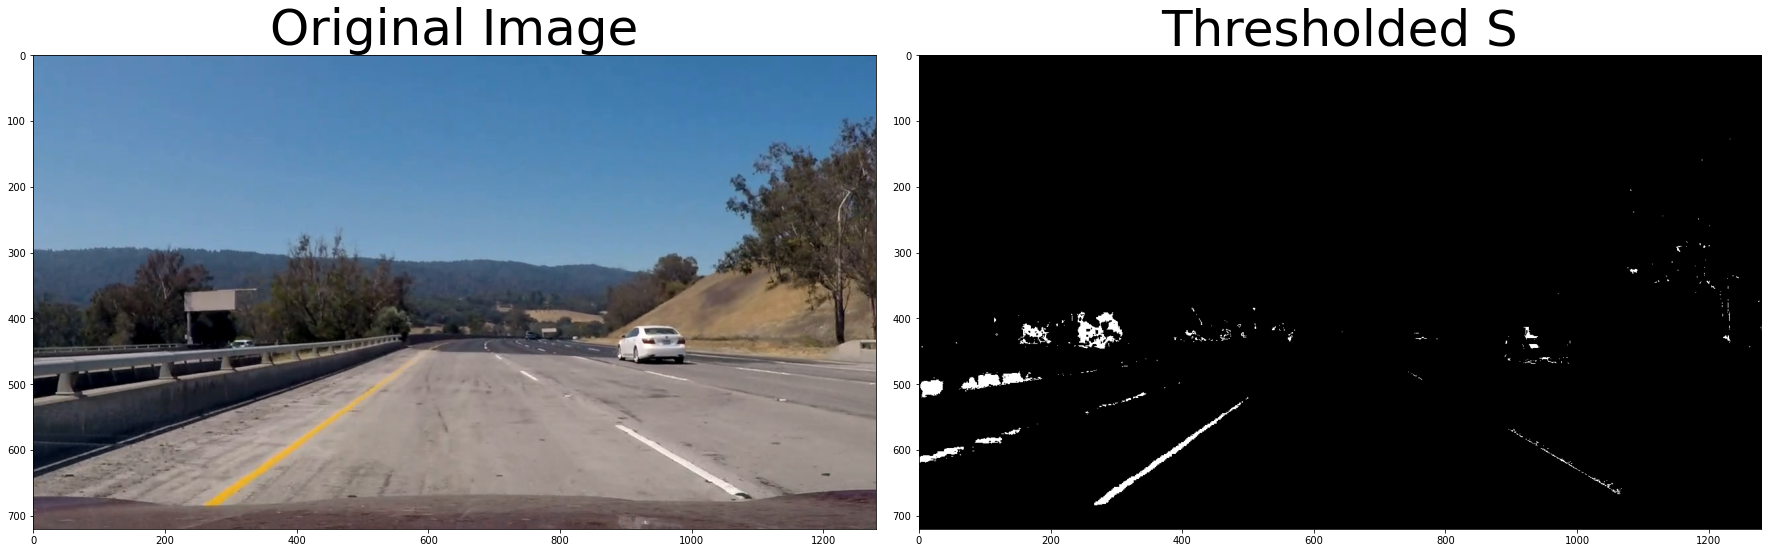

In [98]:
# Read in an image, you can also try test1.jpg or test4.jpg
image = mpimg.imread('test6.jpg') 
p = 'project_images/out{}.png'.format(585)
image = cv2.imread(p)[:,:,::-1]
img_hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
# TODO: Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    binary_output = np.zeros_like(img_hls[:,:,-1])
    #binary_output = img_hls[:,:,-1]
    binary_output[(img_hls[:,:,-1] >= thresh[0]) & (img_hls[:,:,-1] <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary_output
    
# Optional TODO - tune the threshold to try to match the above image!    
#hls_binary = hls_select(image, thresh=(0, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
hls_binary = hls_select(image, thresh=(170, 255))
#binary_output = np.zeros_like(img_hls[:,:,-1])
#binary_output[(img_hls[:,:,-1] >= 120) & (img_hls[:,:,-1] <= 200)] = 1
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [95]:
binary_output

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

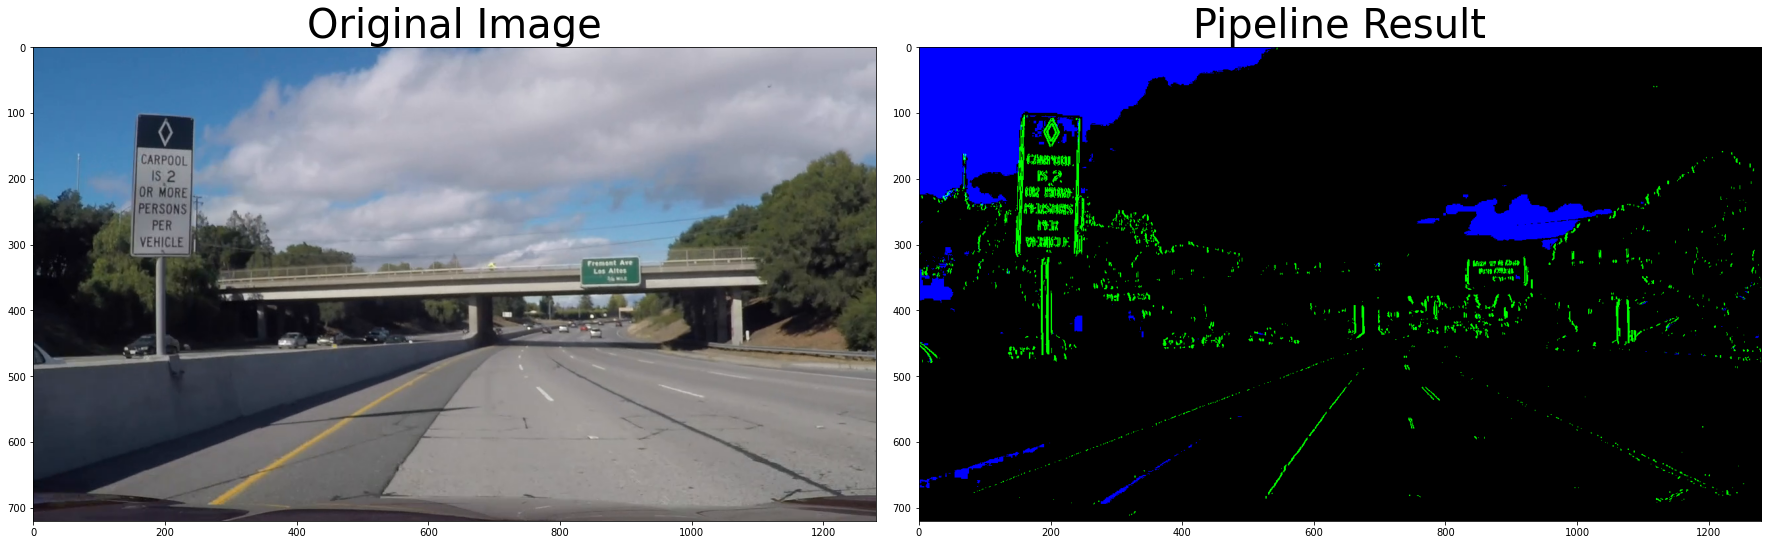

In [68]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interactive
#image = mpimg.imread('bridge_shadow.jpg')
%matplotlib inline
#p = 'project_images/out{}.png'.format(585)
#p = 'challenge_images/out{}.png'.format(10)
p = 'challenge_images/out{}.png'.format(65)
image = cv2.imread(p)[:,:,::-1]


# Edit this function to create your own pipeline.

hls_img = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

def lab(img, thresh=(170, 255), channel=0):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    h_channel = hls[:,:,channel]
    
    h_binary = np.zeros_like(h_channel)
    h_idx = (h_channel >= thresh[0]) & (h_channel <= thresh[1])
    h_binary[h_idx] = 1
    return h_binary

def hue(img, thresh=(170, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    
    h_binary = np.zeros_like(h_channel)
    h_idx = (h_channel >= thresh[0]) & (h_channel <= thresh[1])
    h_binary[h_idx] = 1
    return h_binary
    
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sx_idx = (scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])
    sxbinary[sx_idx] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_idx = (s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])
    s_binary[s_idx] = 1
    
    s_binary_new = np.zeros_like(s_channel)
    s_binary_new[s_idx | sx_idx] = 255
    #s_binary_new[s_idx | sx_idx ] = 1
    
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return s_binary_new, color_binary
    #return s_binary
    
gray_result, result = pipeline(image, s_thresh=(102, 205), sx_thresh=(30, 250))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [43]:
def f(s_min, s_max, sx_min, sx_max):
    gray_result, result = pipeline(image, s_thresh=(s_min, s_max), sx_thresh=(sx_min, sx_max))
    plt.figure(figsize=(11, 8))
    plt.imshow(result)
    
interactive_plot = interactive(f, s_min=(0, 255), s_max=(0, 255), sx_min=(0,255), sx_max=(0,255))
#output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=127, description='s_min', max=255), IntSlider(value=127, description='s_…

In [70]:
def g(h_min, h_max):
    result = hue(image, thresh=(h_min, h_max))
    plt.figure(figsize=(11, 8))
    plt.imshow(result, cmap='gray')
    
interactive_plot = interactive(g, h_min=(0, 180), h_max=(0, 180))
#output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=90, description='h_min', max=180), IntSlider(value=90, description='h_ma…

In [78]:
def h(h_min, h_max):
    result = lab(image, thresh=(h_min, h_max), channel=2)
    plt.figure(figsize=(11, 8))
    plt.imshow(result, cmap='gray')
    
interactive_plot = interactive(h, h_min=(0, 255), h_max=(0, 255))
#output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=127, description='h_min', max=255), IntSlider(value=127, description='h_…

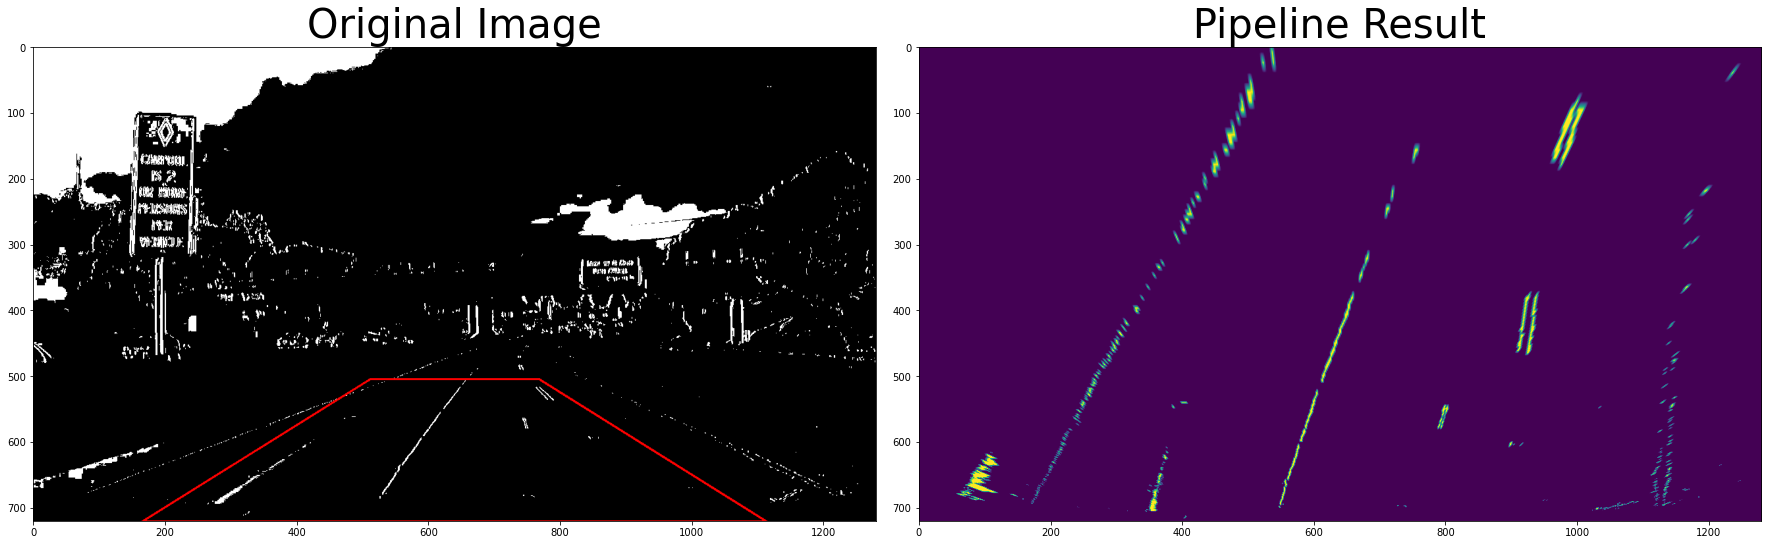

In [46]:
h = gray_result.shape[0]
w = gray_result.shape[1]
# vertices for mask
#points_x = np.array([0.13, 0.48, 0.55, 0.89]) * w
#points_y = np.array([1, 0.62, 0.62, 1]) * h
y_top = 0.70
x_low = 0.13
x_top_ctr = 0.10
points_x = np.array([x_low, 0.5-x_top_ctr, 0.5+x_top_ctr, 1-x_low]) * w
points_y = np.array([1, y_top, y_top, 1]) * h
#points_x = np.array([206, 588, 697, 1113])
#points_y = np.array([720, 455, 455, 720])
vertices = np.vstack((points_x, points_y)).transpose().astype(np.float32)
offset_x = 300
offset_y = 300
dst_vertices = np.array([[offset_x, h], [offset_x, offset_y], [w-offset_x, offset_y], [w-offset_x, h]], dtype=np.float32)
m = cv2.getPerspectiveTransform(vertices, dst_vertices)
new_im = cv2.warpPerspective(gray_result, m, (w, h), cv2.INTER_LINEAR)
#new_im = cv2.warpPerspective(image, m, (w, h), cv2.INTER_LINEAR)

result_c = np.dstack([gray_result, gray_result, gray_result])

#result_c = np.zeros([h,w,3], dtype=np.uint8)
#result_c[:,:,0] = result
#result_c[:,:,1] = result
#result_c[:,:,2] = result
for i in range(4):
    p1 = vertices[i].astype(int)
    p2 = vertices[(i+1)%4].astype(int)
    cv2.line(result_c, tuple(p1), tuple(p2), (255, 0,0), 2)
    
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout() 
ax1.imshow(result_c)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(new_im)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

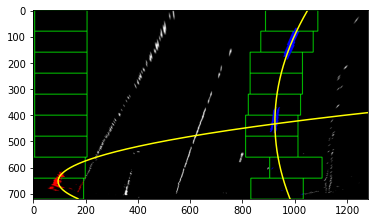

In [47]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

# Load our image
binary_warped = new_im

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 20

    # Set height of windows - based on nwindows above and image shape
    window_height = int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin  # Update this
        win_xright_high = rightx_current + margin  # Update this
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        y_idx = (nonzeroy >= win_y_low) & (nonzeroy < win_y_high)
        good_left_inds = ((nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high) & y_idx).nonzero()[0]
        good_right_inds = ((nonzerox >= win_xright_low) & (nonzerox < win_xright_high) & y_idx).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if len(good_left_inds) > minpix:
            leftx_current = nonzerox[good_left_inds].mean().astype(int)
        if len(good_right_inds) > minpix:
            rightx_current = nonzerox[good_right_inds].mean().astype(int)

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    left_fit = np.polyfit(lefty, leftx,  2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img


out_img = fit_polynomial(binary_warped)
#leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)
plt.imshow(out_img)

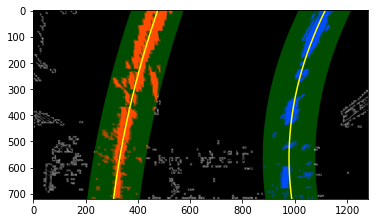

In [105]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load our image - this should be a new frame since last time!
binary_warped = mpimg.imread('warped_example.jpg')

# Polynomial fit values from the previous frame
# Make sure to grab the actual values from the previous step in your project!
left_fit = np.array([ 2.13935315e-04, -3.77507980e-01,  4.76902175e+02])
right_fit = np.array([4.17622148e-04, -4.93848953e-01,  1.11806170e+03])

def fit_poly(img_shape, leftx, lefty, rightx, righty):
    ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = ploty**2 * left_fit[0] + ploty * left_fit[1] + left_fit[2]
    right_fitx = ploty**2 * right_fit[0] + ploty * right_fit[1] + right_fit[2]
    
    return left_fitx, right_fitx, ploty

def search_around_poly(binary_warped):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100
    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    nonzero_x_curve_left = left_fit[0] * nonzeroy**2 + left_fit[1] * nonzeroy + left_fit[2]
    nonzero_x_curve_right = right_fit[0] * nonzeroy**2 + right_fit[1] * nonzeroy + right_fit[2]
    left_lane_inds = (nonzerox >= nonzero_x_curve_left - margin) & (nonzerox < nonzero_x_curve_left + margin)
    right_lane_inds = (nonzerox >= nonzero_x_curve_right - margin) & (nonzerox < nonzero_x_curve_right + margin)
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
    
    return result

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
result = search_around_poly(binary_warped)

# View your output
plt.imshow(result)

1625.0601831657216 1976.2967307714334


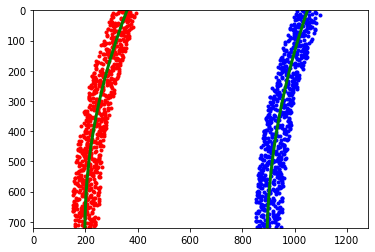

In [14]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def generate_data():
    '''
    Generates fake data to use for calculating lane curvature.
    In your own project, you'll ignore this function and instead
    feed in the output of your lane detection algorithm to
    the lane curvature calculation.
    '''
    # Set random seed number so results are consistent for grader
    # Comment this out if you'd like to see results on different random data!
    np.random.seed(0)
    # Generate some fake data to represent lane-line pixels
    ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
    quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
    # For each y position generate random x position within +/-50 pix
    # of the line base position in each case (x=200 for left, and x=900 for right)
    leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                    for y in ploty])
    rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                    for y in ploty])

    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


    # Fit a second order polynomial to pixel positions in each fake lane line
    left_fit = np.polyfit(ploty, leftx, 2)
    right_fit = np.polyfit(ploty, rightx, 2)
    
    return leftx, rightx, ploty, left_fit, right_fit

    
def measure_curvature_pixels():
    '''
    Calculates the curvature of polynomial functions in pixels.
    '''
    # Start by generating our fake example data
    # Make sure to feed in your real data instead in your project!
    leftx, rightx, ploty, left_fit, right_fit = generate_data()
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    ##### TO-DO: Implement the calculation of R_curve (radius of curvature) #####
    left_curverad = ((1 + (2*left_fit[0] * y_eval + left_fit[1])**2)**(3/2))/abs(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0] * y_eval + right_fit[1])**2)**(3/2))/abs(2*right_fit[0])
    
#    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
#    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    return left_curverad, right_curverad


# Calculate the radius of curvature in pixels for both lane lines

leftx, rightx, ploty, left_fit, right_fit = generate_data()
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
left_fitx = left_fit[0] * ploty**2 + left_fit[1] * ploty + left_fit[2]
right_fitx = right_fit[0] * ploty**2 + right_fit[1] * ploty + right_fit[2]
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images
left_curverad, right_curverad = measure_curvature_pixels()
print(left_curverad, right_curverad)

# Should see values of 1625.06 and 1976.30 here, if using
# the default `generate_data` function with given seed number

In [15]:
import numpy as np

def generate_data(ym_per_pix, xm_per_pix):
    '''
    Generates fake data to use for calculating lane curvature.
    In your own project, you'll ignore this function and instead
    feed in the output of your lane detection algorithm to
    the lane curvature calculation.
    '''
    # Set random seed number so results are consistent for grader
    # Comment this out if you'd like to see results on different random data!
    np.random.seed(0)
    # Generate some fake data to represent lane-line pixels
    ploty = np.linspace(0, 719, num=720) # to cover same y-range as image
    quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
    # For each y position generate random x position within +/-50 pix
    # of the line base position in each case (x=200 for left, and x=900 for right)
    leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                    for y in ploty]) 
    rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                    for y in ploty])

    #ploty = ploty * ym_per_pix
    #leftx = leftx * xm_per_pix
    #rightx = rightx * xm_per_pix
    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y
    print(ploty.dtype)

    # Fit a second order polynomial to pixel positions in each fake lane line
    ##### TO-DO: Fit new polynomials to x,y in world space #####
    ##### Utilize `ym_per_pix` & `xm_per_pix` here #####
    left_fit_cr = np.polyfit(ploty, leftx, 2)
    right_fit_cr = np.polyfit(ploty, rightx, 2)
    
    return ploty, left_fit_cr, right_fit_cr

def convert_coef_pix2m(coef, xm_per_pix, ym_per_pix):
    a = coef[0] * xm_per_pix / (ym_per_pix**2)
    b = coef[0] * xm_per_pix / ym_per_pix
    return np.array([a, b, coef[2]])
    
def measure_curvature_real():
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    # Start by generating our fake example data
    # Make sure to feed in your real data instead in your project!
    
    ploty, left_fit_cr, right_fit_cr = generate_data(ym_per_pix, xm_per_pix)
    left_fit_cr = convert_coef_pix2m(left_fit_cr, xm_per_pix, ym_per_pix)
    right_fit_cr = convert_coef_pix2m(right_fit_cr, xm_per_pix, ym_per_pix)
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty) * ym_per_pix
    
    ##### TO-DO: Implement the calculation of R_curve (radius of curvature) #####
    left_curverad = ((1 + (2*left_fit_cr[0] * y_eval + left_fit_cr[1])**2)**(3/2))/abs(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0] * y_eval + right_fit_cr[1])**2)**(3/2))/abs(2*right_fit_cr[0])
    
    return ploty, left_curverad, right_curverad


# Calculate the radius of curvature in meters for both lane lines
ploty, left_curverad, right_curverad = measure_curvature_real()

print(left_curverad, 'm', right_curverad, 'm')
# Should see values of 533.75 and 648.16 here, if using
# the default `generate_data` function with given seed number

float64
536.2802641991028 m 650.2228199772167 m
